In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/Advait0801/SPPU-COMP-2019-Assignments/refs/heads/ML/K-Means%20Clustering/sales_data_sample.csv', encoding ="unicode_escape")
ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
# Remove PRODUCTCODE
ds = ds.drop(columns=['PRODUCTCODE'])

# Remove address fields
ds = ds.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CITY', 'STATE', 'COUNTRY'])

# Remove attributes that uniquely identify the customer or the order
ds = ds.drop(columns=['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'PHONE'])
ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54


In [4]:
ds.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [5]:
# Convert ORDERDATE to a numeric attribute (Unix timestamp)
ds['ORDERDATE'] = pd.to_datetime(ds['ORDERDATE'])
ds['ORDERDATE'] = ds['ORDERDATE'].astype('int64') // 10**9

# Transform STATUS into a numeric attribute
ds['STATUS'] = ds['STATUS'].replace('Shipped', 1)
ds['STATUS'] = ds['STATUS'].replace('Resolved', 2)
ds['STATUS'] = ds['STATUS'].replace('Cancelled', 3)
ds['STATUS'] = ds['STATUS'].replace('On Hold', 4)
ds['STATUS'] = ds['STATUS'].replace('Disputed', 5)
ds['STATUS'] = ds['STATUS'].replace('In Process', 6)

ds = pd.get_dummies(ds, columns=['PRODUCTLINE'])
ds

<ipython-input-5-a87959095216>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['STATUS'] = ds['STATUS'].replace('In Process', 6)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,1046044800,1,1,2,2003,95,False,True,False,False,False,False,False
1,10121,34,81.35,5,2765.90,1052265600,1,2,5,2003,95,False,True,False,False,False,False,False
2,10134,41,94.74,2,3884.34,1057017600,1,3,7,2003,95,False,True,False,False,False,False,False
3,10145,45,83.26,6,3746.70,1061769600,1,3,8,2003,95,False,True,False,False,False,False,False
4,10159,49,100.00,14,5205.27,1065744000,1,4,10,2003,95,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,1101945600,1,4,12,2004,54,False,False,False,True,False,False,False
2819,10373,29,100.00,1,3978.51,1107129600,1,1,1,2005,54,False,False,False,True,False,False,False
2820,10386,43,100.00,4,5417.57,1109635200,2,1,3,2005,54,False,False,False,True,False,False,False
2821,10397,34,62.24,1,2116.16,1111968000,1,1,3,2005,54,False,False,False,True,False,False,False


In [6]:
from sklearn.cluster import KMeans

intertia = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds)
    intertia.append(kmeans.inertia_)

intertia

[1.1205901524749025e+18,
 2.4827356832141363e+17,
 1.4330538291370589e+17,
 7.819428731463426e+16,
 4.313700054471338e+16,
 2.917884167457018e+16,
 2.4789972470084576e+16,
 1.7214007473284274e+16,
 1.398481597194681e+16,
 1.0219723810930954e+16,
 9163119701887300.0,
 8041315310309126.0,
 6747144465847008.0,
 5828685926463003.0,
 5106921022025324.0,
 4088574340407568.5,
 3712841115081006.0,
 3196883478729687.0,
 2758346392627916.5]

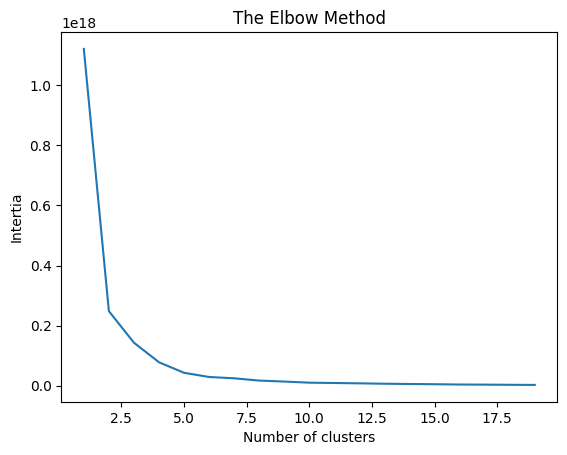

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, 20), intertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

In [8]:
# Optimal K = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(ds)
clusters = kmeans.predict(ds)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


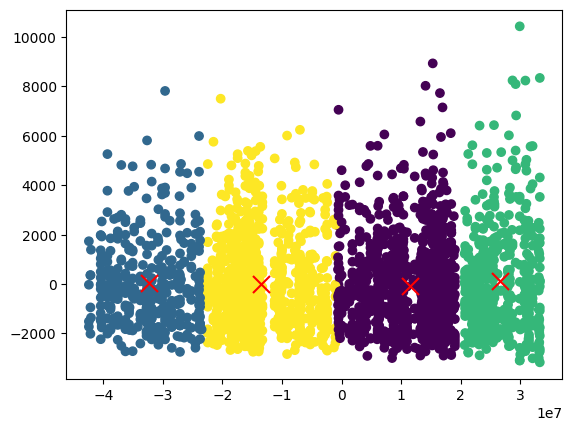

In [9]:
from sklearn.decomposition import PCA

# Reduce the dimensions of the data to 2
# to visualize it on a 2D plane
pca = PCA(2)
reduced_dataset = pca.fit_transform(ds)
reduced_centroids = pca.transform(centroids)

plt.scatter(reduced_dataset[:,0], reduced_dataset[:,1], c=clusters, cmap='viridis')
plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1], marker='x', s=150, c='r')